In [1]:
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output
from jupyter_dash import JupyterDash
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import numpy as np
import plotly.graph_objects as go


Reading Data & Inspecting Data

In [2]:
CountryWise=pd.read_csv('country_wise_latest.csv')

In [3]:
CountryWise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
CountryWise.rename(columns={'Country/Region':'Country','1 week % increase':'One_Week_Increase_Perc'},inplace=True)

In [ ]:
CountryWise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  One_Week_Increase_Perc  187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
CountryWise.describe(include='all')

c:\Users\ihab_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,One_Week_Increase_Perc,WHO Region
count,187,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000,187
unique,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
mean,NaN,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203,NaN
std,NaN,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838,NaN
min,NaN,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000,NaN
25%,NaN,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000,NaN
50%,NaN,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000,NaN
75%,NaN,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000,NaN


<Axes: >

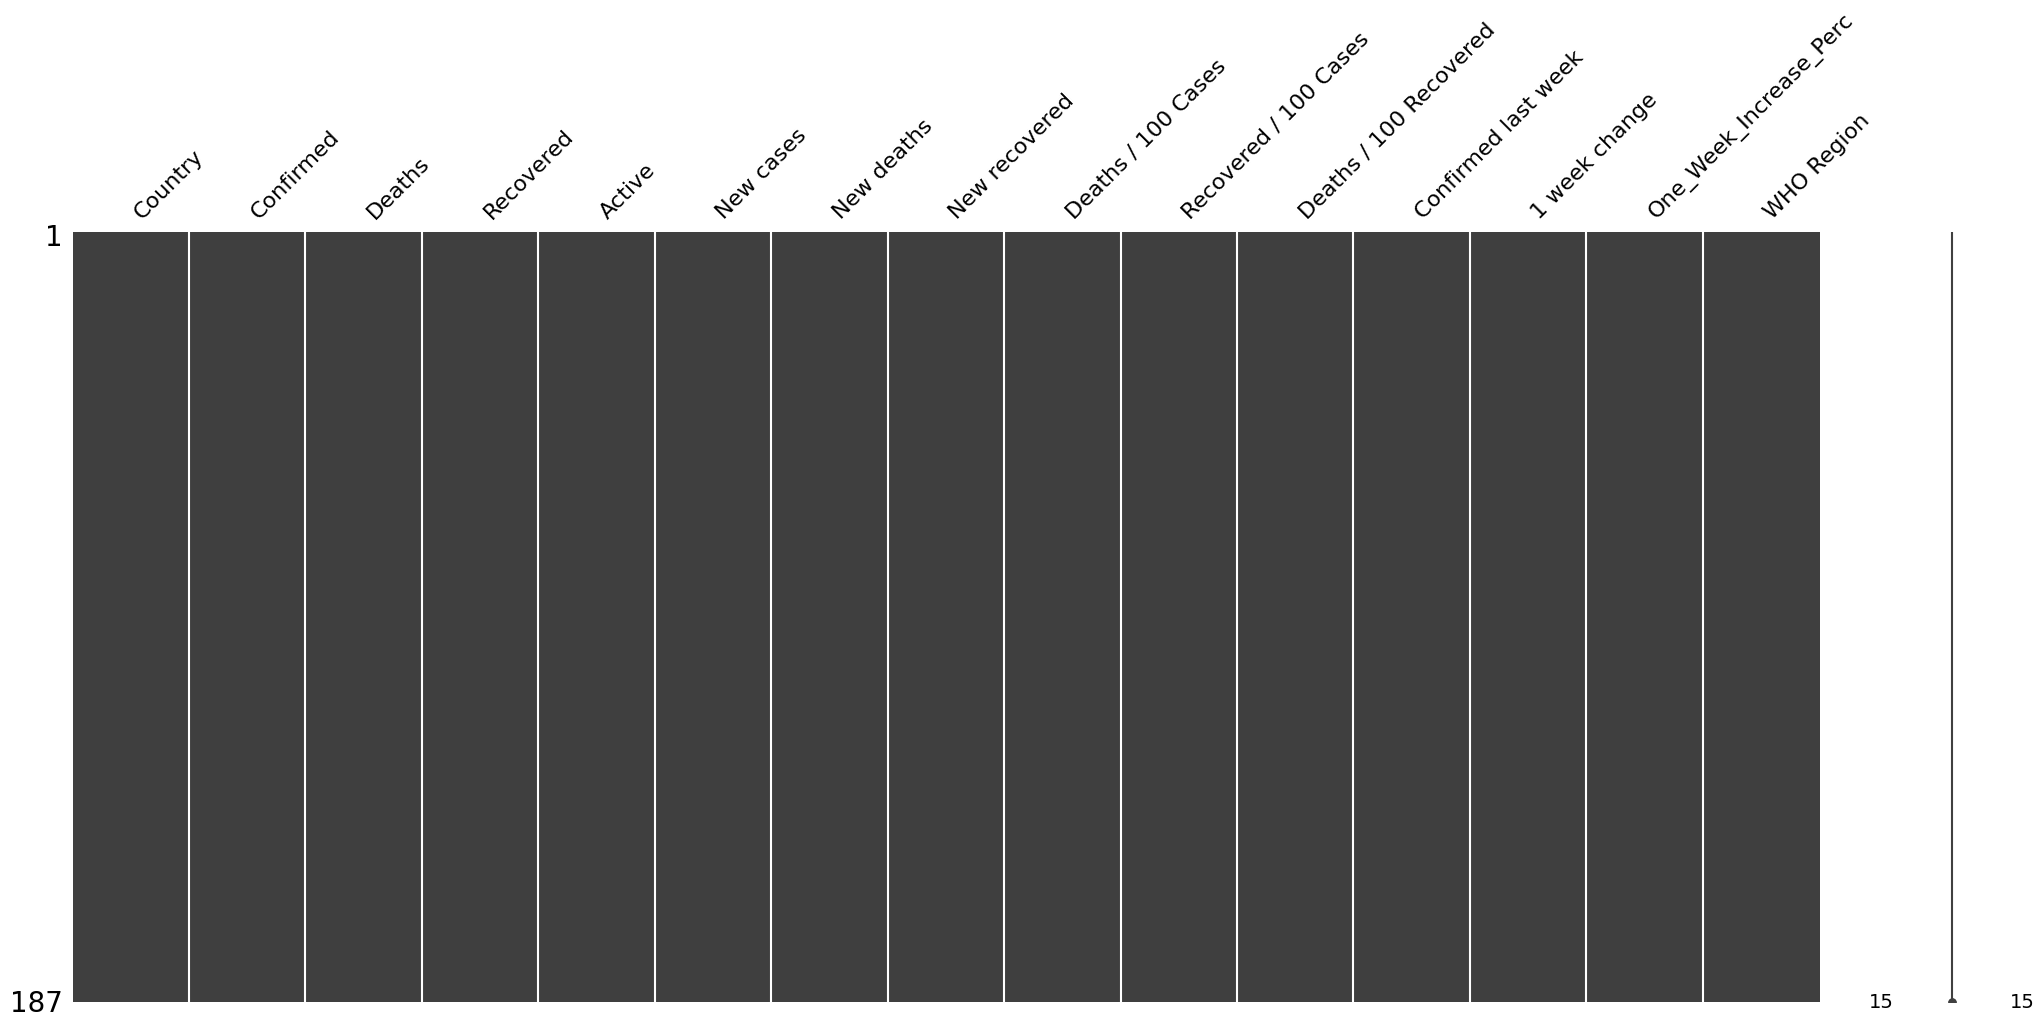

In [7]:
import missingno
missingno.matrix(CountryWise)
#There's no null values

In [8]:
CountryWise.duplicated().sum()
#There's no Duplicates

np.int64(0)

DASH & EDA

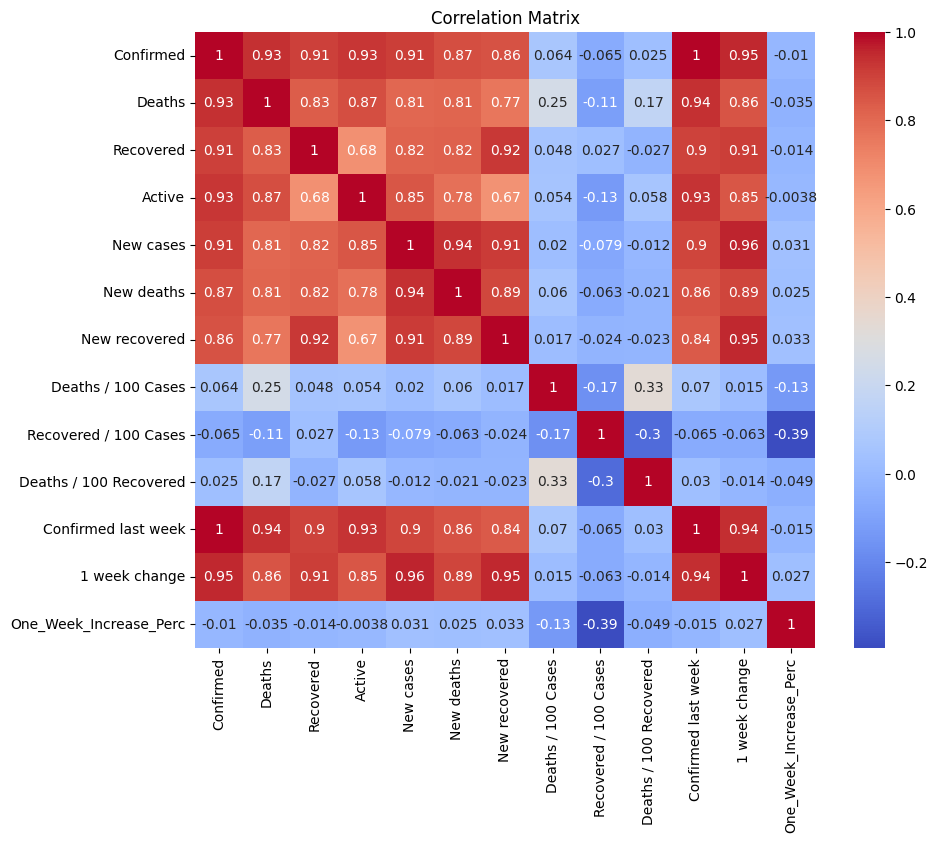

In [9]:
plt.figure(figsize=(10,8))
num_cols=CountryWise.select_dtypes(include=[int,float])
sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
#Average Recovery Rate by WHO REGION
AVR_RR = CountryWise.groupby('WHO Region')[['Recovered / 100 Cases']].mean().reset_index()
# Calculate Average Fatality Rate by WHO Region
AVR_FR = CountryWise.groupby('WHO Region')[['Deaths / 100 Cases']].mean().reset_index()
# Calculate Weekly Growth Trends by WHO Region
Week_Change = CountryWise.groupby('WHO Region')[['One_Week_Increase_Perc']].mean().reset_index()

In [11]:
app = JupyterDash(__name__)

c:\Users\ihab_\AppData\Local\Programs\Python\Python312\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [12]:
app.layout = html.Div(style={'backgroundColor': '#f7f7f7', 'padding': '20px'}, children=[
    html.H1("COVID-19 Analysis Dashboard", style={'textAlign': 'center', 'color': '#333'}),

    # Dropdown Menu for selecting metric
    dcc.Dropdown(
        id="dropdown",
        options=[
            {"label": "Confirmed Cases", "value": "Confirmed"},
            {"label": "Deaths", "value": "Deaths"},
            {"label": "Recovered Cases", "value": "Recovered"},
            {"label": "Active Cases", "value": "Active"}
        ],
        value="Confirmed",  
        style={'width': '50%', 'margin': '20px auto'}
    ),

    # Section for Bar Charts (Top 10 Countries)
    html.Div([
        html.Div([
            html.Div([
                dcc.Graph(id="bar-plot")
            ], style={'width': '48%', 'display': 'inline-block'}),

            html.Div([
                dcc.Graph(id="region-bar-plot")
            ], style={'width': '48%', 'display': 'inline-block'})
        ], style={'display': 'flex', 'justify-content': 'space-between', 'gap': '4%'}),  # Flexbox layout to align side by side
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'border-radius': '10px', 'box-shadow': '0px 4px 6px rgba(0,0,0,0.1)', 'margin-bottom': '30px'}),  # Card-style section

    # Section for Pie Charts (Recovery and Fatality Rate)
    html.Div([
        html.H3("COVID-19 Recovery and Fatality Rate by WHO Region", style={'textAlign': 'center', 'color': '#444'}),
        html.Div([
            html.Div([
                dcc.Graph(
                    id="recovery-rate-pie",
                    figure=px.pie(AVR_RR, names='WHO Region', values='Recovered / 100 Cases', title='Average Recovery Rate by WHO Region')
                )
            ], style={'width': '48%', 'display': 'inline-block'}),

            html.Div([
                dcc.Graph(
                    id="fatality-rate-pie",
                    figure=px.pie(AVR_FR, names='WHO Region', values='Deaths / 100 Cases', title='Average Fatality Rate by WHO Region')
                )
            ], style={'width': '48%', 'display': 'inline-block'})
        ], style={'display': 'flex', 'justify-content': 'space-between', 'gap': '4%', 'margin-top': '20px'})
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'border-radius': '10px', 'box-shadow': '0px 4px 6px rgba(0,0,0,0.1)', 'margin-bottom': '30px'}),  # Card-style section

    # Section for Weekly Growth Trends (Line Chart)
    html.Div([
        html.H3("Weekly Growth Trends by WHO Region", style={'textAlign': 'center', 'color': '#444'}),
        dcc.Graph(
            id="weekly-growth-line",
            figure=px.line(Week_Change, x='WHO Region', y='One_Week_Increase_Perc', title='Weekly Growth Trends by WHO Region')
        )
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'border-radius': '10px', 'box-shadow': '0px 4px 6px rgba(0,0,0,0.1)', 'margin-bottom': '30px'}), 
])



In [13]:
@app.callback(
    Output("bar-plot", "figure"),
    [Input("dropdown", "value")]
)
def update_graph(selected_metric):
    # Select top 10 countries by the selected metric
    filtered_data = CountryWise.nlargest(10, selected_metric)

    fig = px.bar(
        filtered_data,
        x=selected_metric,
        y="Country",
        orientation="h",
        title=f"Top 10 Countries by {selected_metric}"
    )

    return fig

In [14]:
@app.callback(
    Output("region-bar-plot", "figure"),
    [Input("dropdown", "value")]
)
def update_who_region_graph(selected_metric):
    fig = px.bar(
        CountryWise,
        x='WHO Region',
        y='Confirmed',
        color='Deaths',
        title="Confirmed Cases by WHO Region, Colored by Deaths"
    )

    return fig

In [15]:
if __name__ == '__main__':
    app.run_server(mode="external", debug=True)

Dash app running on http://127.0.0.1:8050/
